# Simulate the Penalty Game

In [1]:
from environment import PenaltyGame
from agent import RandomAgent, QLearner
from HystereticQLearner import HystereticQLearner
from boltzmann import selection as boltzmann_policy
from utils import simulate_task, find_greedy_action_for_state
import matplotlib.pyplot as plt
import numpy as np
import random
random.seed()

## Test Bed

In [2]:
# Simulate
## Parameters

exploration_rate = None
def discount_rate(_): return 0
def learning_rate(_): return 0.1
def decrease_rate(_): return 0.01

temperature_start = None  # Replace T = num with T = temperature_start maybe?
timesteps = 3000
num_simulations = 500

rewards = {}

## Penalty Game k = 0

In [3]:
# Simulate
## Parameters

num_converge = 0
rewards_temp = np.zeros((num_simulations, timesteps))

for i in range(num_simulations):
#     print("#------------------------#")
#     print("| Simulation {}          |".format(i))
#     print("#------------------------#")

    task = PenaltyGame(0)

    agent1 = HystereticQLearner(task, exploration_rate, learning_rate, discount_rate, decrease_rate, policy=boltzmann_policy)
    agent2 = HystereticQLearner(task, exploration_rate, learning_rate, discount_rate, decrease_rate, policy=boltzmann_policy)

    T = 5000
    t = 0
    while(t < timesteps):
        t, T = simulate_task([agent1, agent2], task, t, T, timesteps=timesteps)
        rewards_temp[i][t - 1] = agent1.accumulated_reward
        agent1.accumulated_reward = 0 
    joint_action = [find_greedy_action_for_state(agent, 0) for agent in [agent1, agent2]]
    if(joint_action == ['A', 'A'] or joint_action == ['C', 'C']):
        num_converge += 1
print("Percentage of simulations converged: {}%".format(num_converge / num_simulations * 100))
#         print("timestep: {}; system temp: {}".format(t, T))
#         print("#--------------------------------------------#")
rewards["k=0"] = rewards_temp

/home/davin/Documents/GitHub/hysteretic-q-learning/boltzmann.py:13: RuntimeWarning: overflow encountered in double_scalars
  if e**(x/T) == np.Infinity and x > highInf:


Percentage of simulations converged: 100.0%


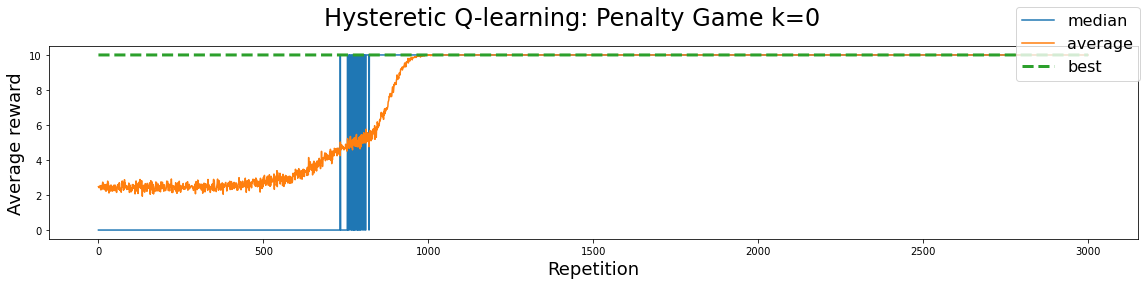

In [4]:
fig = plt.figure(figsize=(16,4))
plt.plot(range(timesteps), np.median(rewards["k=0"], axis=0), label='median')
plt.plot(range(timesteps), np.average(rewards["k=0"], axis=0), label='average')
plt.plot(range(timesteps), np.repeat(10, timesteps), '--', lw=3, label='best')

fig.suptitle('Hysteretic Q-learning: Penalty Game k=0', fontsize=24)
plt.xlabel('Repetition', fontsize=18)
plt.ylabel('Average reward', fontsize=18)
fig.legend(fontsize=16)
plt.tight_layout()

## Penalty Game k = -100

In [5]:
# Simulate
## Parameters
num_converge = 0
rewards_temp = np.zeros((num_simulations, timesteps))

for i in range(num_simulations):
#     print("#------------------------#")
#     print("| Simulation {}          |".format(i))
#     print("#------------------------#")

    task = PenaltyGame(-100)

    agent1 = HystereticQLearner(task, exploration_rate, learning_rate, discount_rate, decrease_rate, policy=boltzmann_policy)
    agent2 = HystereticQLearner(task, exploration_rate, learning_rate, discount_rate, decrease_rate, policy=boltzmann_policy)

    T = 5000
    t = 0
    while(t < timesteps):
        t, T = simulate_task([agent1, agent2], task, t, T, timesteps=timesteps)
        rewards_temp[i][t - 1] = agent1.accumulated_reward
        agent1.accumulated_reward = 0
    joint_action = [find_greedy_action_for_state(agent, 0) for agent in [agent1, agent2]]
    if(joint_action == ['A', 'A'] or joint_action == ['C', 'C']):
        num_converge += 1
    else:
        print(joint_action)
print("Percentage of simulations converged: {}%".format(num_converge / num_simulations * 100))
#         print("timestep: {}; system temp: {}".format(t, T))
#         print("#--------------------------------------------#")
rewards["k=-100"] = rewards_temp

/home/davin/Documents/GitHub/hysteretic-q-learning/boltzmann.py:13: RuntimeWarning: overflow encountered in double_scalars
  if e**(x/T) == np.Infinity and x > highInf:


['B', 'B']
['B', 'B']
['B', 'B']
['B', 'B']
['B', 'B']
['B', 'B']
Percentage of simulations converged: 98.8%


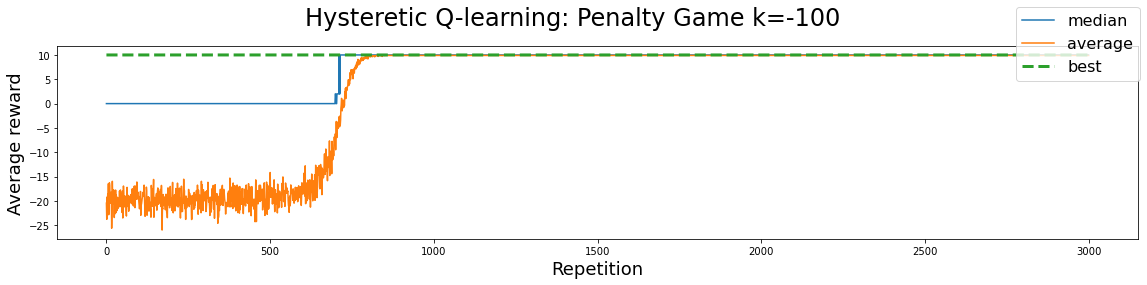

In [6]:
fig = plt.figure(figsize=(16,4))
plt.plot(range(timesteps), np.median(rewards["k=-100"], axis=0), label='median')
plt.plot(range(timesteps), np.average(rewards["k=-100"], axis=0), label='average')
plt.plot(range(timesteps), np.repeat(10, timesteps), '--', lw=3, label='best')

fig.suptitle('Hysteretic Q-learning: Penalty Game k=-100', fontsize=24)
plt.xlabel('Repetition', fontsize=18)
plt.ylabel('Average reward', fontsize=18)
fig.legend(fontsize=16)
plt.tight_layout()

# Decentralized q-learning

In [ ]:
# Simulate
## Parameters

num_converge = 0
rewards_temp = np.zeros((num_simulations, timesteps))

for i in range(num_simulations):
#     print("#------------------------#")
#     print("| Simulation {}          |".format(i))
#     print("#------------------------#")

    task = PenaltyGame(0)

    agent1 = QLearner(task, exploration_rate, learning_rate, discount_rate, policy=boltzmann_policy)
    agent2 = QLearner(task, exploration_rate, learning_rate, discount_rate, policy=boltzmann_policy)

    T = 5000
    t = 0
    while(t < timesteps):
        t, T = simulate_task([agent1, agent2], task, t, T, timesteps=timesteps)
        rewards_temp[i][t - 1] = agent1.accumulated_reward
        agent1.accumulated_reward = 0 
    joint_action = [find_greedy_action_for_state(agent, 0) for agent in [agent1, agent2]]
    if(joint_action == ['A', 'A'] or joint_action == ['C', 'C']):
        num_converge += 1
print("Percentage of simulations converged: {}%".format(num_converge / num_simulations * 100))
#         print("timestep: {}; system temp: {}".format(t, T))
#         print("#--------------------------------------------#")

In [ ]:
# Simulate
## Parameters
num_converge = 0
rewards_temp = np.zeros((num_simulations, timesteps))

for i in range(num_simulations):
#     print("#------------------------#")
#     print("| Simulation {}          |".format(i))
#     print("#------------------------#")

    task = PenaltyGame(-100)

    agent1 = QLearner(task, exploration_rate, learning_rate, discount_rate, policy=boltzmann_policy)
    agent2 = QLearner(task, exploration_rate, learning_rate, discount_rate, policy=boltzmann_policy)
    
    T = 5000
    t = 0
    while(t < timesteps):
        t, T = simulate_task([agent1, agent2], task, t, T, timesteps=timesteps)
        rewards_temp[i][t - 1] = agent1.accumulated_reward
        agent1.accumulated_reward = 0
    joint_action = [find_greedy_action_for_state(agent, 0) for agent in [agent1, agent2]]
    if(joint_action == ['A', 'A'] or joint_action == ['C', 'C']):
        num_converge += 1
    else:
        print(joint_action)
print("Percentage of simulations converged: {}%".format(num_converge / num_simulations * 100))
#         print("timestep: {}; system temp: {}".format(t, T))
#         print("#--------------------------------------------#")
rewards["k=-100"] = rewards_temp

# Random agent

In [9]:
random_rewards_1 = {} # agent 1 is random

random_rewards_2 = {} # agent 2 is random

k_val = [0, -100]

for k in k_val:
    rewards_temp = np.zeros((num_simulations, timesteps))

    for i in range(num_simulations):
        task = PenaltyGame(k)

        agents = [RandomAgent(task),
                  HystereticQLearner(task, exploration_rate, learning_rate, discount_rate, decrease_rate, policy=boltzmann_policy)]
    #     print("#------------------------#")
    #     print("| Simulation {}          |".format(i))
    #     print("#------------------------#")

        t = 0
        T = 5000
        for j in range(timesteps):
            t, T = simulate_task(agents, task, t, T, timesteps=timesteps)
            rewards_temp[i][j] = agents[0].accumulated_reward
            agents[0].accumulated_reward = 0

    random_rewards_1["k={}".format(k)] = rewards_temp
    
for k in k_val:
    rewards_temp = np.zeros((num_simulations, timesteps))

    for i in range(num_simulations):
        task = PenaltyGame(k)

        agents = [HystereticQLearner(task, exploration_rate, learning_rate, discount_rate, decrease_rate, policy=boltzmann_policy),
             RandomAgent(task)]
    #     print("#------------------------#")
    #     print("| Simulation {}          |".format(i))
    #     print("#------------------------#")

        t = 0
        T = 5000
        for j in range(timesteps):
            t, T = simulate_task(agents, task, t, T, timesteps=timesteps)
            rewards_temp[i][j] = agents[0].accumulated_reward
            agents[0].accumulated_reward = 0

    random_rewards_2["k={}".format(k)] = rewards_temp

/home/davin/Documents/GitHub/hysteretic-q-learning/boltzmann.py:13: RuntimeWarning: overflow encountered in double_scalars
  if e**(x/T) == np.Infinity and x > highInf:


# Plot

In [29]:
import numpy as np
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

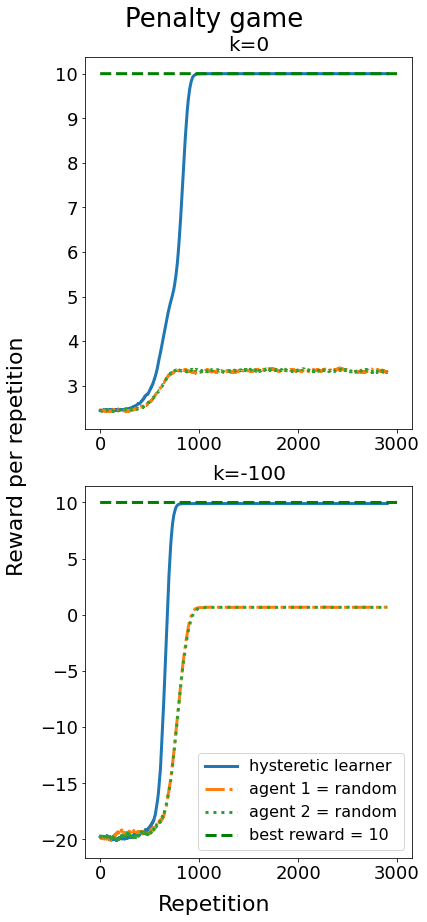

In [71]:
# fig = plt.figure(figsize=(16,6))
k_vals = [0, -100]

# fig, axs = plt.subplots(1, 2, figsize=(18, 7) )
fig, axs = plt.subplots(2, 1, figsize=(6, 13) )

for j in range(len(k_vals)):
    k = k_vals[j]
    ax = axs[j]
    
    num_x = 3000
    x = np.array(range(num_x))
    
#     ax.plot(np.mean(rewards["k={}".format(k)], axis=0), label='hysteretic learner')
#     ax.plot(np.average(random_rewards_1["k={}".format(k)], axis=0), label='agent 1 = random')
#     ax.plot(np.average(random_rewards_2["k={}".format(k)], axis=0), label='agent 2 = random')
    
    
    ax.plot(moving_average(np.mean(rewards["k={}".format(k)], axis=0), 100), '-', lw=3, label='hysteretic learner')
    ax.plot(moving_average(np.average(random_rewards_1["k={}".format(k)], axis=0), 100), '-.', lw=3, label='agent 1 = random')
    ax.plot(moving_average(np.average(random_rewards_2["k={}".format(k)], axis=0), 100), ':', lw=3, label='agent 2 = random')
    
    ax.plot(range(num_x), np.repeat(10, num_x), '--', lw=3, label='best reward = 10', color='green')
    ax.set_title("k={}".format(k), fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=18)

    if(j == 1):
        ax.legend(fontsize=16, loc='best')

    # plt.plot(range(5000), np.repeat(7.62, 5000), '--', lw=3, label='line', color='green')

fig.suptitle('Penalty game', fontsize=26)
fig.supxlabel('Repetition', fontsize=22)
fig.supylabel('Reward per repetition', fontsize=22)
parameters_text = r'$\alpha = 0.1,\gamma=0, \beta=0.01, \tau_{init}=5000, \tau_i = \tau_{i-1} * 0.99$'

# plt.figtext(0.1, -0.035,s="Averaged over 500 trials with {}. Best possible reward is 10.".format(parameters_text), fontsize=13)

fig.tight_layout()

# plt.ylim(-30, 12)

# Save data

In [72]:
import pickle
from copy import deepcopy
filename = f'penalty_data_complete.pickle'
outfile = open(filename,'wb')
pickle.dump(deepcopy((rewards, random_rewards_1, random_rewards_2)), outfile)
outfile.close()